In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [3]:
data = pd.read_csv('insurance.csv')

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [6]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_test.shape

(268, 9)

In [12]:
lreg = linear_model.LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [13]:
lreg.intercept_

-12390.804294570282

In [14]:
metrics.r2_score(y_train, lreg.predict(X_train))    

0.7417255854683333

In [15]:
metrics.r2_score(y_test, lreg.predict(X_test))

0.7835929767120723

In [16]:
metrics.mean_absolute_error(y_train, lreg.predict(X_train))

4208.234572492218

In [18]:
metrics.mean_absolute_error(y_test, lreg.predict(X_test))

4181.1944737536405

In [19]:
metrics.mean_absolute_percentage_error(y_train, lreg.predict(X_train))

0.4220268508031629

In [20]:
metrics.mean_absolute_percentage_error(y_test, lreg.predict(X_test))

0.46888255979146604

<AxesSubplot: >

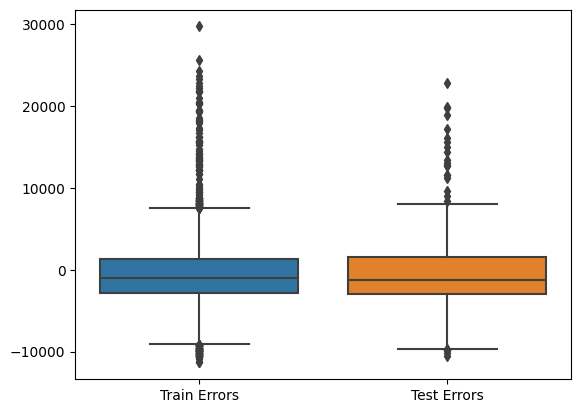

In [21]:
train_errors = y_train - lreg.predict(X_train)
test_errors = y_test - lreg.predict(X_test)
erros_df = pd.DataFrame({'Train Errors': train_errors, 'Test Errors': test_errors})
sns.boxplot(erros_df)

In [22]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train = poly.transform(X_train)
X_test = poly.transform(X_test)
X_train.shape

(1070, 54)

In [24]:
lreg.fit(X_train, y_train)

LinearRegression()

In [26]:
metrics.r2_score(y_test, lreg.predict(X_test))    

0.8662036595023128

In [27]:
lreg.coef_

array([-1.25535964e+15,  8.22086142e+15, -2.38739413e+16,  1.83195442e+16,
        8.00999865e+15, -4.79371307e+16, -8.29635351e+16, -3.28541682e+16,
       -3.35602892e+16,  8.53425000e+03,  9.06375000e+02,  8.90375000e+02,
       -1.69956250e+03,  1.58562500e+02,  1.25535964e+15,  1.25535964e+15,
        1.25535964e+15,  1.25535964e+15,  1.77051073e+17,  7.82640625e+02,
       -1.13895312e+03,  3.64406250e+02, -1.85271935e+17, -1.85271935e+17,
       -1.85271935e+17, -1.85271935e+17, -9.68415039e+03,  1.56881152e+03,
        5.49810742e+04,  2.38739413e+16,  2.38739413e+16,  2.38739413e+16,
        2.38739413e+16, -1.95200000e+03, -2.28800000e+03, -1.83195442e+16,
       -1.83195442e+16, -1.83195442e+16, -1.83195442e+16, -2.45710065e+15,
       -5.55289800e+15, -5.55289800e+15, -5.55289800e+15, -5.55289800e+15,
       -4.33475823e+16,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -8.32117797e+15,  0.00000000e+00,  0.00000000e+00, -5.84305448e+16,
        0.00000000e+00, -

In [31]:
lasso_lr = linear_model.Lasso(max_iter=2000)
lasso_lr.fit(X_train, y_train)

Lasso(max_iter=2000)

In [33]:
metrics.r2_score(y_test, lasso_lr.predict(X_test))

0.8668072143180998

In [35]:
metrics.mean_absolute_percentage_error(y_test, lasso_lr.predict(X_test))

0.30069898575817605

In [36]:
ridge_lr = linear_model.Ridge()
ridge_lr.fit(X_train, y_train)

Ridge()

In [39]:
metrics.mean_absolute_percentage_error(y_test, ridge_lr.predict(X_test))

0.3137974995231023